In [1]:
import matplotlib.pyplot as plt
from neural_network import build_model,predict,plot_decision_boundary
import numpy as np
from sklearn.datasets import make_moons

In [34]:
X, y = make_moons(200,noise=0.20)
nn_hdim =4 
print(X.shape)

(200, 2)


In [3]:
def softmax(z):
    exp_z = np.exp(z - np.max(z))
    soft_max = exp_z / np.sum(exp_z)
    return soft_max

In [4]:
def weight_initialization(x_shape, nndim, y_shape):
    W1 = np.random.randn(x_shape, nndim)
    b1 = np.zeros((1,nndim))
    W2 = np.random.randn(nndim,y_shape)
    b2 = np.zeros((1,y_shape))
    parameters = {
        "W1": W1,
        "b1" : b1,
        "W2": W2,
        "b2" : b2
      }
    return parameters

In [5]:
parameters = weight_initialization(X.shape[1], nn_hdim, 2)
print(parameters['W1'].shape)
print(parameters['b1'].shape)
print(parameters['W2'].shape)
print(parameters['b2'].shape)

(2, 4)
(1, 4)
(4, 2)
(1, 2)


In [6]:
def feedfoward(X,W1,W2,b1,b2):
        a = np.dot(X,W1) + b1
        #print(a.shape)
        h = np.tanh(a)
        #print(h.shape)
        z = np.dot(h,W2) + b2
        #print(z.shape)
        y_pred = softmax(z)
        #print(y_pred.shape)
        return a,h,z,y_pred

In [7]:
print(X[1].shape)

(2,)


In [8]:
a,h,z,y_pred = feedfoward(X[4],parameters['W1'],parameters['W2'],parameters['b1'],parameters['b2'])
print(a,h,z,y_pred)

[[-1.27097066 -0.18445111 -0.28900313 -0.23782213]] [[-0.85406051 -0.18238738 -0.28121704 -0.2334376 ]] [[1.01533451 0.33043433]] [[0.66483149 0.33516851]]


In [9]:
def one_hot_encoding(y):
    if y==1:
        y=np.array([0,1])
    else:
        y=np.array([1,0])
    return y

In [10]:
def calculate_loss(model,X, y):
    W1, W2, b1, b2 = model['W1'], model['W2'], model['b1'], model['b2']
    a,h,z,y_pred = feedfoward(X,W1,W2,b1,b2)
    y = one_hot_encoding(y)
    #print(y)
    #if y_pred==0:
    #    logY = np.multiply(y, 0)
    #    logY_= np.multiplty(1-y,np.log2(1-y_pred))
    #    loss = -np.sum(logY + logY_)/2 
    #elif y_pred==1:
    #    logY = np.multiply(y, np.log2(y_pred))
    #    logY_ = np.multiply(1-y,0)
    #    loss = -np.sum(logY + logY_)/2 
    #else:
    #print(X.shape[0])
    loss = -np.sum(np.multiply(y, np.log(y_pred)) +  np.multiply(1-y, np.log(1-y_pred)))/X.shape[0]
    
    #print (loss)
    #cost = -np.sum(np.multiply(Y, np.log(A2)) +  np.multiply(1-Y, np.log(1-A2)))/m
    loss = np.squeeze(loss)
    cost = {
    "a": a,
    "h": h,
    "z": z,
    "y_pred": y_pred,
    "loss":loss
    }
    return cost

In [11]:
cost = calculate_loss(parameters,X[0], y[0])
print(cost['loss'])

0.4394011193838229


In [12]:
def backward_prop(X, Y, cost, parameters):
    a = cost['a']
    h = cost['h'] 
    y_pred = cost['y_pred']
    W2 = parameters['W2']
    X = np.reshape(X,(1,2))
    Y = one_hot_encoding(Y)
    
    dZ2 = np.subtract(y_pred,Y)
    dW2 = np.dot(h.T,dZ2)
    db2 = dZ2#np.sum(dZ2, axis=1, keepdims=True)/m
    dZ1 = np.multiply(np.dot(dZ2,W2.T), 1-np.power(np.tanh(a),2))
    dW1 = np.dot(X.T,dZ1)
    db1 = dZ1#np.sum(dZ1, axis=1, keepdims=True)/m

    grads = {
    "dW1": dW1,
    "db1": db1,
    "dW2": dW2,
    "db2": db2
    }

    return grads

In [13]:
grad = backward_prop(X[1], y[1], cost, parameters)
print(grad['dW1'].shape)
print(grad['db1'].shape)
print(grad['dW2'].shape)
print(grad['db2'].shape)

(2, 4)
(1, 4)
(4, 2)
(1, 2)


In [14]:
def update_parameters(parameters, grads, learning_rate):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2

    new_parameters = {
    "W1": W1,
    "W2": W2,
    "b1" : b1,
    "b2" : b2
    }

    return new_parameters

In [97]:
def build_model(X, y, nn_hdim, num_passes=20000, print_loss=False):
    c= 0
    learning_rate = 0.01
    parameters= weight_initialization(X.shape[1], nn_hdim, 2)
    for i in range(num_passes):
        if i % X.shape[0]-1==0:
            c = 0
        cost = calculate_loss(parameters,X[c],y[c])
        if print_loss == True:
            print(cost['loss'])
        grads = backward_prop(X[c], y[c], cost, parameters)
        parameters= update_parameters(parameters, grads, learning_rate)
        #print(c)
        #print(i)
        c = c +1
    return parameters

In [98]:
nnhdim =4
model  =  build_model(X,y ,nnhdim,print_loss=True) 

0.14670451649935534
0.14380907148230082
0.803987946572067
0.20575297495153225
0.21487482571914823
0.5871490510721327
0.19063421471432768
0.9924378207319524
0.5176607628901099
0.16262988718663499
0.45852277292734445
1.4832962611763971
0.27139053021166426
0.2370944122521078
0.3363711606259241
0.5395612782740499
0.22817530123159152
0.2777247981291606
0.1333402226322787
0.3690812270254142
0.1317194383797561
0.1798149197639157
0.3602558854669508
0.1785925070048703
0.17958048158905587
0.177312901816049
0.2275527850188867
0.1787801827346653
1.6091854329363626
0.5483176345035312
0.1681403747466312
0.5238126928297797
1.3524114511486214
0.2825066032875948
0.29990350558701606
0.8646837347763596
0.5906158814712735
0.15853924432008673
0.47658892934196134
0.44467332057494224
0.7030137926390919
0.1810730302375674
0.9875496238079388
0.10927495636423351
0.4281050748329103
0.30573666449746323
0.2336710062696537
0.17757060006916967
0.1337109989207902
0.1418668046223281
0.24137592360249388
0.1292762281409

0.09024005866542166
0.11021530324931503
0.07743401232084401
0.05035620486930571
0.051994950885209994
0.05980060789963018
0.041464879743369445
0.009695715450206324
0.031012075690537245
0.025983841118289757
1.1470254430395808
0.03578916851321467
0.09909394235059324
0.05389317448907485
0.10390991466634097
0.059057610393459255
0.03265219835288433
0.07139585136221017
0.04827170736990181
0.17875459758009643
0.08318361523673914
0.03933552157972877
0.05311034692900643
1.5362107516726708
0.10682215553333588
0.3987718160551411
0.5984565223544684
0.06681987423367526
0.04731217915492919
0.678511500756699
0.041271306129635144
0.28331601882355517
0.8145721473651193
0.026813950937990973
1.049804312442403
0.05741730601398703
0.14033572970566027
0.2886016695097605
0.02916003627879516
0.062372611151559156
0.07455279221823637
0.11117778050250568
0.0718332102262875
0.07398708847858043
0.015461612376695934
0.1343824765495405
0.4250688434383563
0.24131528344677636
0.01708145903306965
0.04874238107895222
0.1

0.03873560649610192
0.12382374437356773
0.2567516347971269
0.02269708229060071
0.05683126966074052
0.060469781694643
0.10950025364964329
0.06250993136107817
0.0635154887815772
0.012279305609194942
0.11772852249579105
0.40754270434034257
0.2059531805288386
0.015578111250816203
0.04438663915710447
0.1508378189127631
0.021144346637974726
0.023361632806088155
0.03775945413998565
0.014515557840868113
0.044045700938344805
0.026664561669003748
0.23206430937990308
0.23003641294104227
0.08130807069875547
0.18581805152013642
0.33901817671248957
0.05516838863637489
0.08652242952145361
0.059038845013719934
1.6756614750620922
0.490877366293455
0.04451494068962829
0.08716984775259606
0.07655166162573479
0.04753425182671128
0.5234512658508206
0.03387395385552412
0.045080733147196954
0.7147189481982295
0.01644651601647642
0.14460342079310418
0.09450079215185576
0.08048303090854295
0.025357184844848286
2.2849934885876237
0.7044036136604062
0.034554147877051467
0.029279632133955444
0.02298889513645725
0

0.03627982677515117
0.13779062566009834
0.034070282691930145
0.06723799364584372
0.028198949349531197
0.014524901743437235
3.128694973857483
0.05508941332893016
0.06121520810088265
0.06610950327198724
0.04452359660766572
0.061440149466882234
0.34630738364418023
0.09201586291464564
0.1395453619153233
0.8955045591669106
0.08947193485165542
0.6167741022865625
0.08145299775807761
0.0641256296403365
0.06873213730289082
3.350854017629204
0.039570208416358776
0.03603531500411778
0.03340254023648125
0.11949228004698279
0.10605777433780307
0.15940702200336387
0.03447126627768249
0.05023665422667689
0.036681326153303974
0.06638650605332817
0.039560257156689024
0.03190910805463679
0.019071795933438787
0.0225186520017692
0.031594969149976185
0.06978521803611674
1.6525605624974715
0.1430178196446057
0.018462973611483358
0.13353826236924374
1.5364428629681215
0.028593519036117135
0.04025453338167198
1.3915253962852385
0.6019884000467889
0.023918594980424354
0.2199885792497594
0.18355267526683056
0.8

0.03252404529642712
0.030607303542861147
1.3003373041637332
0.5310150109149514
0.02995940091532031
0.21796656501750653
0.17396997677900347
0.7887041062193355
0.11486348485209186
1.3033491593776354
0.049181874455502976
0.08334310305264753
0.06789837221156368
0.05984775196827271
0.11361254809958901
0.08139708002476731
0.05556666712110464
0.05664738922027745
0.041108871925814465
0.01078458939566233
0.040779308642809084
0.03623009861833098
0.9245602912338658
0.05301008100926008
0.03257931913294672
0.04099969450914079
0.0552683216450551
0.09844825320082004
0.02997372623880781
0.08462428058048498
0.07739165844915417
0.11998390277223678
0.13945209944712314
0.027473525424904506
0.08267870175051173
1.8627230962994978
0.0882862624093287
0.20314068830286935
0.45553094800579175
0.07768743626200274
0.03613971256265035
0.4983831662546001
0.034899802904385
0.11564862779148602
0.5805161302897477
0.03520496845593438
0.859590092328945
0.020140453527509376
0.09637896715444916
0.19537255186398297
0.014929

0.3098824318252119
0.09105297530889786
0.08325762126214224
0.025199893370695968
0.012624681372507312
0.010956973247718561
0.10454986877411593
0.08315008660806172
0.03234842484599971
0.06770047856068759
0.046140771985841676
0.44087031911349495
0.43408171050060285
0.031716150623553624
0.0582566491878133
0.03735863992207536
0.07055586349734666
0.0920900822602369
0.8891286333628656
0.07785379940648834
0.5093481628410751
1.2841304650162395
0.14063932578302965
1.2662886123644954
0.12239647128949989
0.08630851656233433
0.04219743752185664
0.024136653402975505
0.18051488453890274
0.04125623192400423
0.22875256481074913
0.02672774737517034
0.19733377317366663
0.09754333277733226
0.02983198890672817
0.0990007594057176
0.12769745544701158
0.08908287652294784
0.014938033286469686
0.007177801911453825
0.07228210621365244
0.12986611832285613
0.04638032110792295
1.7427680942428463
0.04663859425015174
0.1206612998376057
0.02547295647913364
0.087789728398701
0.01192952811076613
0.02295794865431166
2.67

0.03711945484098673
0.08630656364536911
0.03937956050354254
0.03076207797071555
0.19003833965177153
0.09929996432699538
0.07602676119888978
0.04649375855771272
0.023741819957332596
0.013358788611039576
0.05985218594995937
0.0576837597015038
0.692458056693464
0.05944764312192671
0.016050446147188535
0.022778369688869017
0.030416116304663683
0.12120748103103976
0.02451953072349012
0.12481081848218337
0.08336323734051218
0.0620568391557988
0.1761768542092358
0.022311371464248185
0.08202584763077414
1.780660100979071
0.05913330845235516
0.09760917957828535
0.34562043470882525
0.05395310354713316
0.031608823888032524
0.2965271699903692
0.019299101889903827
0.05222732733211174
0.344010554566269
0.054073121192859355
0.6082280693289396
0.010574661734719517
0.05279378207551666
0.11944943648357381
0.00815285268366021
0.06913364751699007
0.05668231596924894
0.18466902657475232
0.07151790275910694
0.03004603395822513
0.005643626647456961
0.05219484780095478
0.17165666020614606
0.07078744693304034


0.2602373650442108
0.49555524109519217
0.03520039684457694
0.04941010290365783
0.04584254480126268
0.0876205056034116
0.09378532004293137
0.592223893991937
0.07708244709342033
0.2904406054824155
1.0190510705031657
0.0739361240430976
0.9927040518396499
0.09427047215520121
0.06326659866184225
0.0614735210656296
0.03230648470650771
0.16654294379540888
0.033887035697112
0.13281344627416608
0.037155754943338934
0.1156416560643625
0.0907344097110278
0.04256767381433278
0.05426132977109294
0.08113793781448675
0.10179921793689224
0.019777192148365395
0.0021721396296288213
0.039525494015115875
0.11066949323356329
0.02207190392241666
1.5179863780601992
0.05169255293871763
0.11027360163831228
0.017503406851118355
0.11540493182814285
0.004257472851659123
0.026062270923351165
2.302546137065887
0.08816948782980723
0.13608967040245576
0.032415444970266584
0.03942644908778803
0.050254860751754546
0.3184814465407596
0.028080964495288074
0.14580607994141465
0.4494006063067386
0.08279046379219002
0.22356

0.010313328476091907
0.026287884986167735
0.20046169343218273
0.07135286336346747
0.4165353787694378
0.006182268045066156
0.0287194593934225
0.07363563140906444
0.004838344466801564
0.07538400270869045
0.0497444274890333
0.22069044866489895
0.06663862557517727
0.017092997994672197
0.002795948389531332
0.0285616028722213
0.11411219599928749
0.037208969050269214
0.0301113792595978
0.02997157881462927
0.0218156510936879
0.03743329108873887
0.004743334640729529
0.007715118316491403
0.0029927055259002166
0.004893812924212695
0.07107874013922005
0.20235450058188714
0.0655530038019244
0.014077297158280381
0.03751056563975376
0.07324590771185474
0.14587511540489195
0.09299172225579651
0.00860397869215778
1.4447149245946724
0.2334966126641472
0.048621523771885625
0.015756378767482628
0.04002034590866212
0.1359548695088417
0.19930492862115262
0.00846852664302402
0.010034597035088862
0.5613341280988529
0.043360372103395516
0.056973820527209465
0.020324956819172416
0.021988591919718477
0.054517407

0.08514071474595178
0.20835431757086958
0.9104543869122251
0.0434811442256316
0.2743359054784307
0.07535505042438265
0.026241228456875224
0.0183416778057882
1.230645393752261
0.0651607171084131
1.2142874776133248
0.1730090506415068
0.018562948288919905
0.043885035141174956
0.22206190387464725
0.03086203876920305
0.07213006501264167
0.006561439725999516
0.004598927849808877
0.006305508388948105
0.15332703836498096
0.13287433267887547
0.04199356932926048
0.12733257289623529
0.04800369869109656
0.15949863494069957
0.585982526685105
0.02953072451245964
0.040341393708458545
0.0434903005306041
0.09754195521150709
0.08111564225025131
0.39812033299682587
0.0643346324444351
0.16885209527366402
0.8172185387898898
0.043079262803271366
0.8163557559518643
0.0819482061021932
0.04463735845233332
0.08031157455083582
0.03787032798742196
0.13838398424698645
0.02509431773184362
0.08151159861870261
0.040537392190877555
0.07207054829304435
0.07278001040239478
0.05152646117534847
0.030750319184039372
0.0574

0.05962618407011994
1.0927489976700149
0.15783465532191984
0.014906112098542087
0.0423210805513575
0.198178053264359
0.025351536596521278
0.06440403698989536
0.004988041823208847
0.003983557291984484
0.005223620509446199
0.16064744583666912
0.13696284978677037
0.04024502430391222
0.14396743814246205
0.03958572602113449
0.12871090362401982
0.6299832532173829
0.025730067481926865
0.036040698150959415
0.04060197406112709
0.09700907733490663
0.07311947549736339
0.3324119608463024
0.05681131382994331
0.1288933416955309
0.741550412726445
0.03488287255237289
0.7426308027412789
0.07747998061164002
0.03801115916260017
0.08925283409852078
0.03951798358613022
0.1228711534038586
0.02071316130621064
0.0663062341004834
0.04053377176366857
0.05922644220080253
0.06286211380380632
0.054714614744588906
0.02432325270524556
0.04941186004198601
0.06453518124060631
0.01818297139393646
0.0006134116235167483
0.01759319923444956
0.09401003820982157
0.01041017073321857
1.3644732140379328
0.04125826680164468
0.0

0.04054973922973791
0.10638764705610022
0.01656819368817867
0.05429573170717486
0.039759309048313
0.049074236652004416
0.05252970586846884
0.05746883212856852
0.019685475981261136
0.041991629945407324
0.04922100105549153
0.016431861301874927
0.0004526938815728987
0.01422688084561491
0.08978938203556687
0.008823456301562659
1.3203557247191817
0.03593922755354206
0.0670287268492448
0.005553414929798885
0.12974829702866564
0.0010546990611778513
0.015706497085128366
1.8767028769466338
0.08265652710174558
0.2798944239891134
0.014155698160249234
0.00815694699515933
0.017343294313913793
0.2609750611048107
0.00944734036251418
0.09173684735645635
0.2020736410710044
0.07014510172005399
0.09317176418611037
0.07678737842104759
0.10614012140970552
0.0072891172232455856
3.269742495321383
0.15972897898464283
0.005441691158450273
0.049601770169611384
0.11119689321354637
0.014327764405193788
0.018935006304139038
0.0021978345665465836
0.0060131736292510386
0.00487332828210491
0.005698417871857989
0.0492

In [99]:
def predict(model, x):
    #print(x.shape[0])
    y = np.zeros((1,x.shape[0]))
    for i in range(x.shape[0]):
        _,_,_,y_pred = feedfoward(x[i],model['W1'],model['W2'],model['b1'],model['b2'])
        y_pred = np.argmax(y_pred)
        #print(y_pred)
        y[0][i] = y_pred
    return y

In [100]:
predict(model, X)

array([[0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
        0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
        1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
        0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
        1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
        0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
        0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
        1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
        1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
        1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
        0., 0., 1., 1., 0., 1., 0., 0.]])

In [101]:
print(y[40])

0


In [102]:
def plot_decision_boundary(pred_func, X, y ) :
    # Set min and max values  and  give  i t  some padding
    xmin,xmax = X[:,0].min()-.5,  X[:,0].max()+.5
    ymin, ymax = X[:,1].min()-.5,  X[:,1].max()+.5
    h  =  0.01
    # Generate a  grid  of  points  with  distance  h between them
    xx, yy  =  np.meshgrid(np.arange(xmin,xmax,h),np.arange(ymin,ymax,h))
    # Predict  the  function  value  for  the  whole  gid
    #print(np.c_[xx.ravel(),yy.ravel()])
    Z  =  pred_func(np.c_[xx.ravel(),yy.ravel()])
    Z  =  Z.reshape(xx.shape)
    # Plot  the  contour and  training  examples
    plt.contourf( xx , yy,Z , cmap=plt.cm.Spectral)
    plt.scatter(X[:,0 ],X [:,1],c=y,cmap=plt.cm.Spectral)

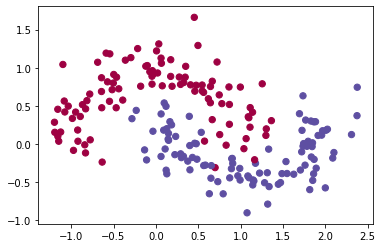

In [103]:
plt.scatter(X[:,0],X[:,1],s=40,c=y,cmap=plt.cm.Spectral)

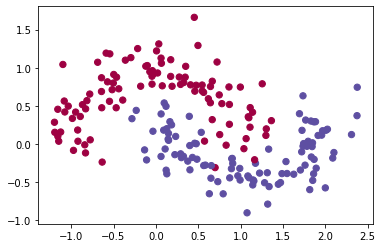

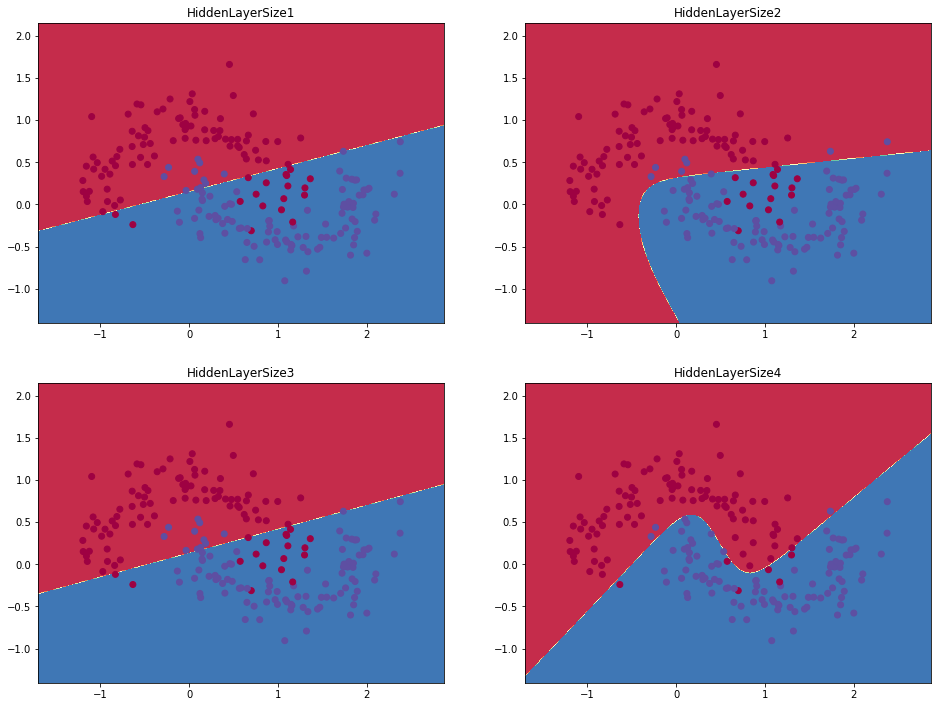

In [105]:
plt.scatter(X[:,0],X[:,1],s=40,c=y,cmap=plt.cm.Spectral)


plt.figure(figsize =(16,32))

hidden_layer_dimensions =  [ 1 ,   2 ,   3 ,   4 ]

for i,nn_hdim in enumerate (hidden_layer_dimensions) :

    plt.subplot( 5, 2, i +1)
    plt.title('HiddenLayerSize%d'  %  nn_hdim )

    model  =  build_model(X,y, nn_hdim)
    plot_decision_boundary(lambda x : predict(model,x ), X, y)
plt.show()